In [1]:
%load_ext wurlitzer
from xspec import *
import os
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

os.chdir('0945060134/pps')


1 spectrum  in use
 
Spectral Data File: P0945060134PNS003SRSPEC0001.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.673e-02 +/- 2.181e-03 (72.8 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-14
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 7820 sec
 Using fit statistic: chi
 Using Background File                P0945060134PNS003BGSPEC0001.FTZ
  Background Exposure Time: 7820 sec
 Using Response (RMF) File            epn_e3_ff20_sdY6.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0945060134PNS003SRCARF0001.FTZ



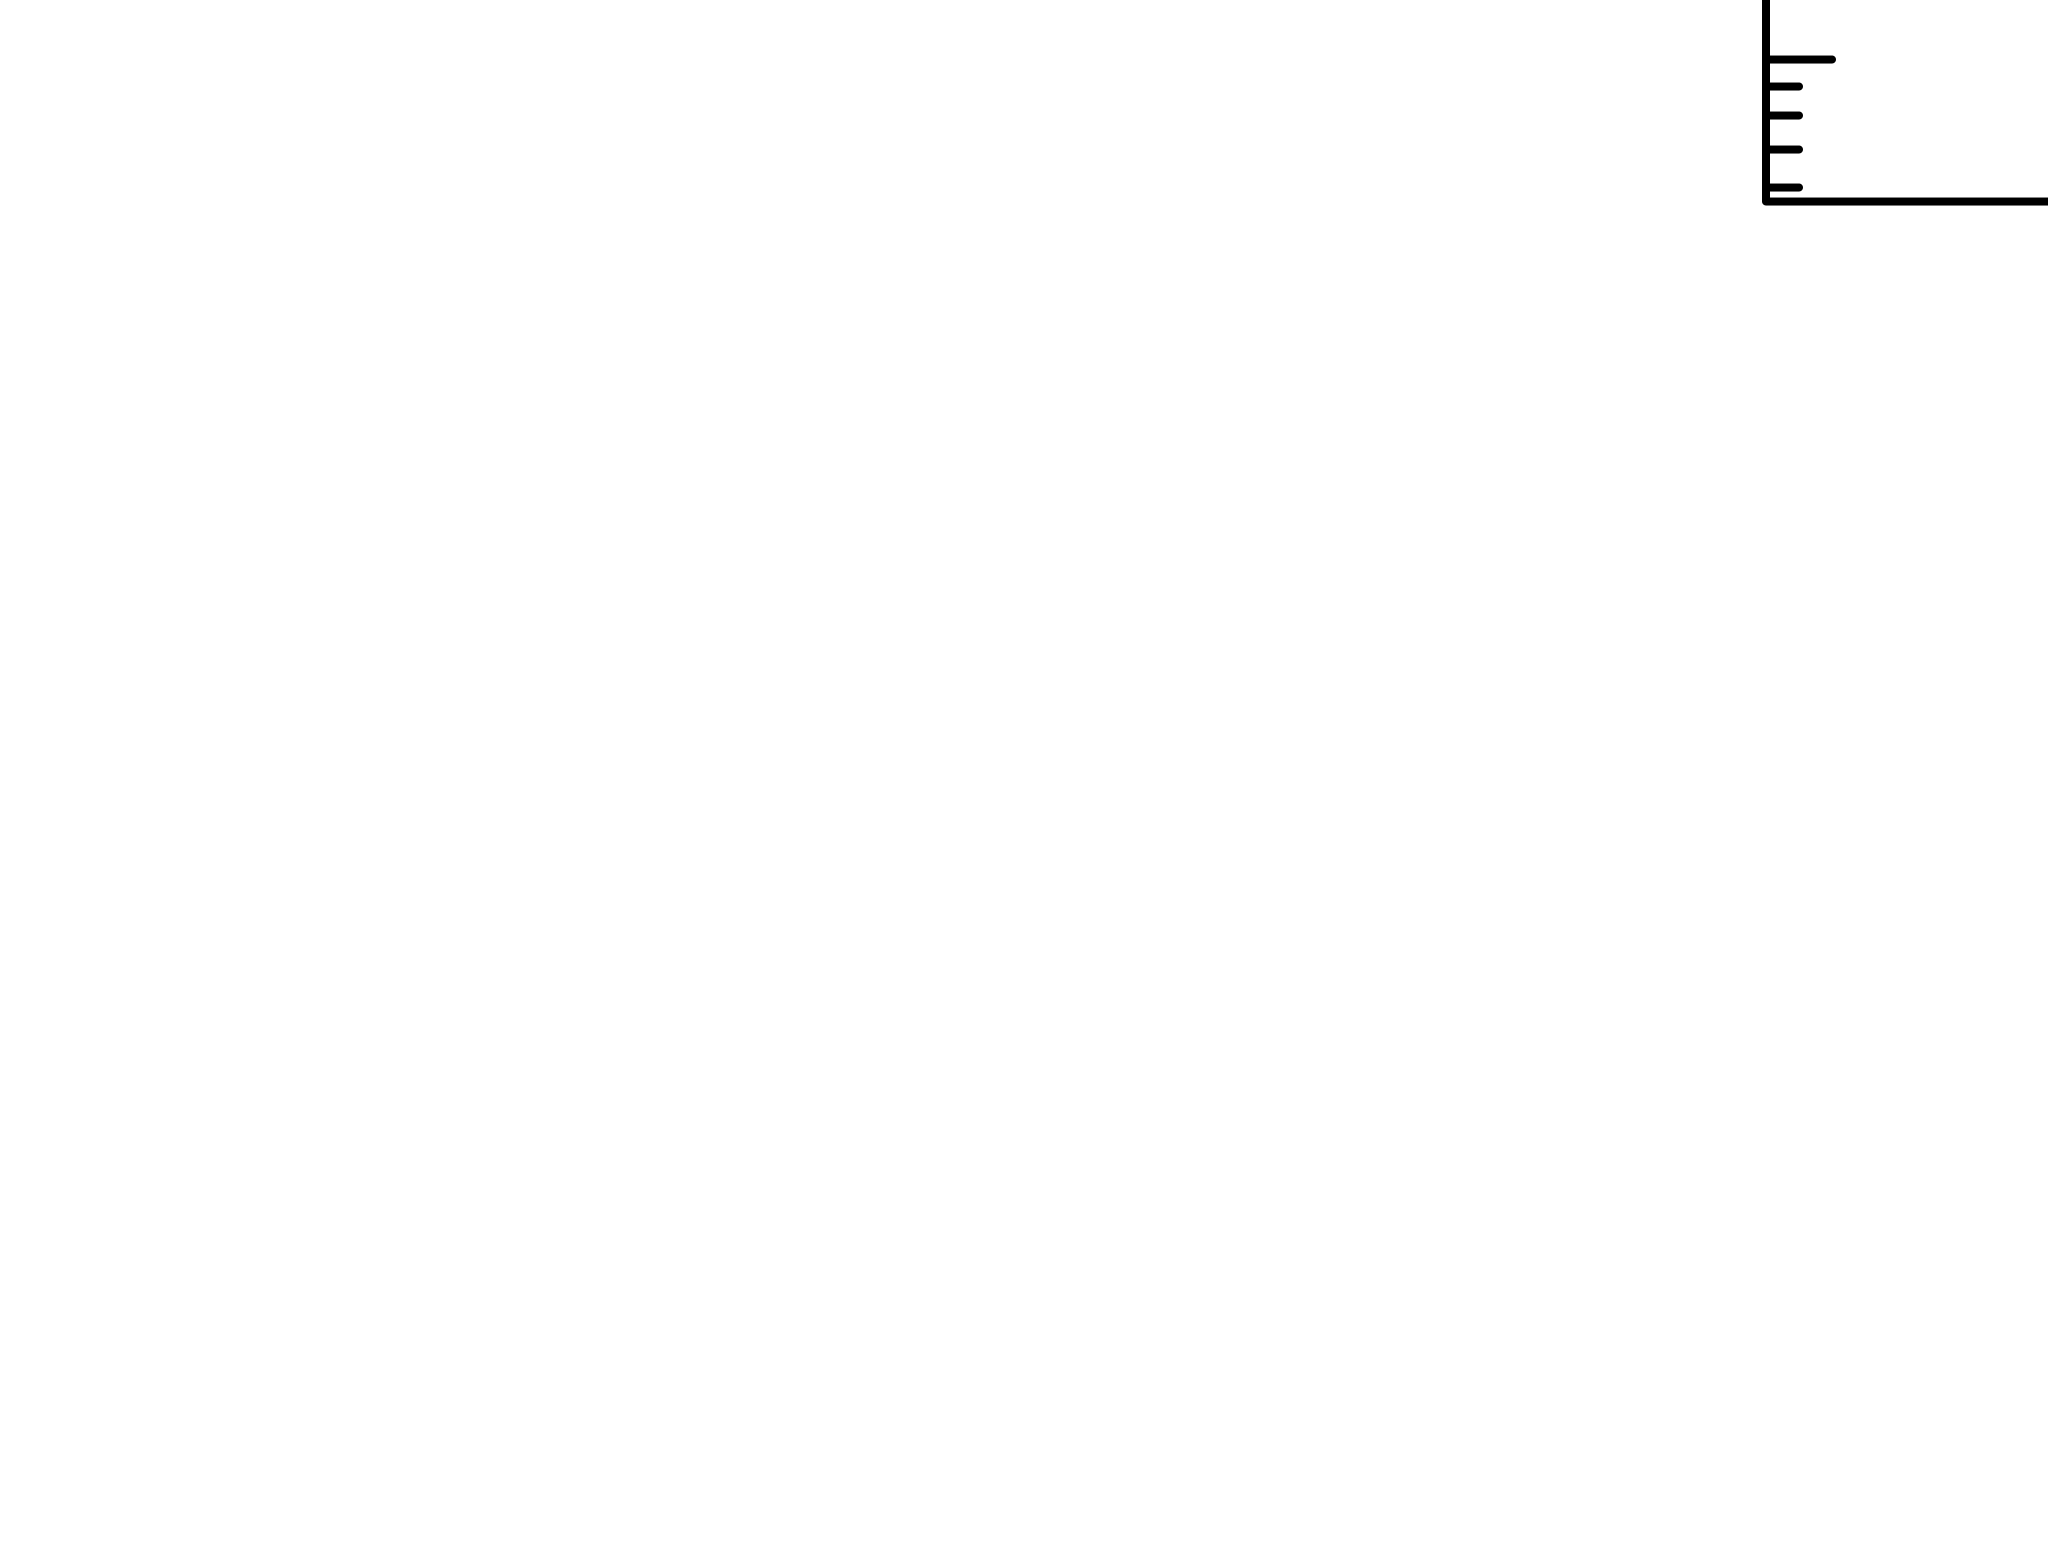

      No channels ignored (no channels in specified range)
     1 channels (14) ignored in spectrum #     1



In [2]:
#spec = Spectrum('0945010135_PN35spec.fits',backFile='0945010135_PN35spec_bkg.fits',respFile='0945010135_PN35spec.rmf')
#spec.response.arf='0945010135_PN35spec.arf'

spec = Spectrum('P0945060134PNS003SRSPEC0001.FTZ')

Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale X 0.1 20")
Plot("data")
spec.ignore("**-0.2 12.0-**")



Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              3.203250e+12     using 13 bins.

Te

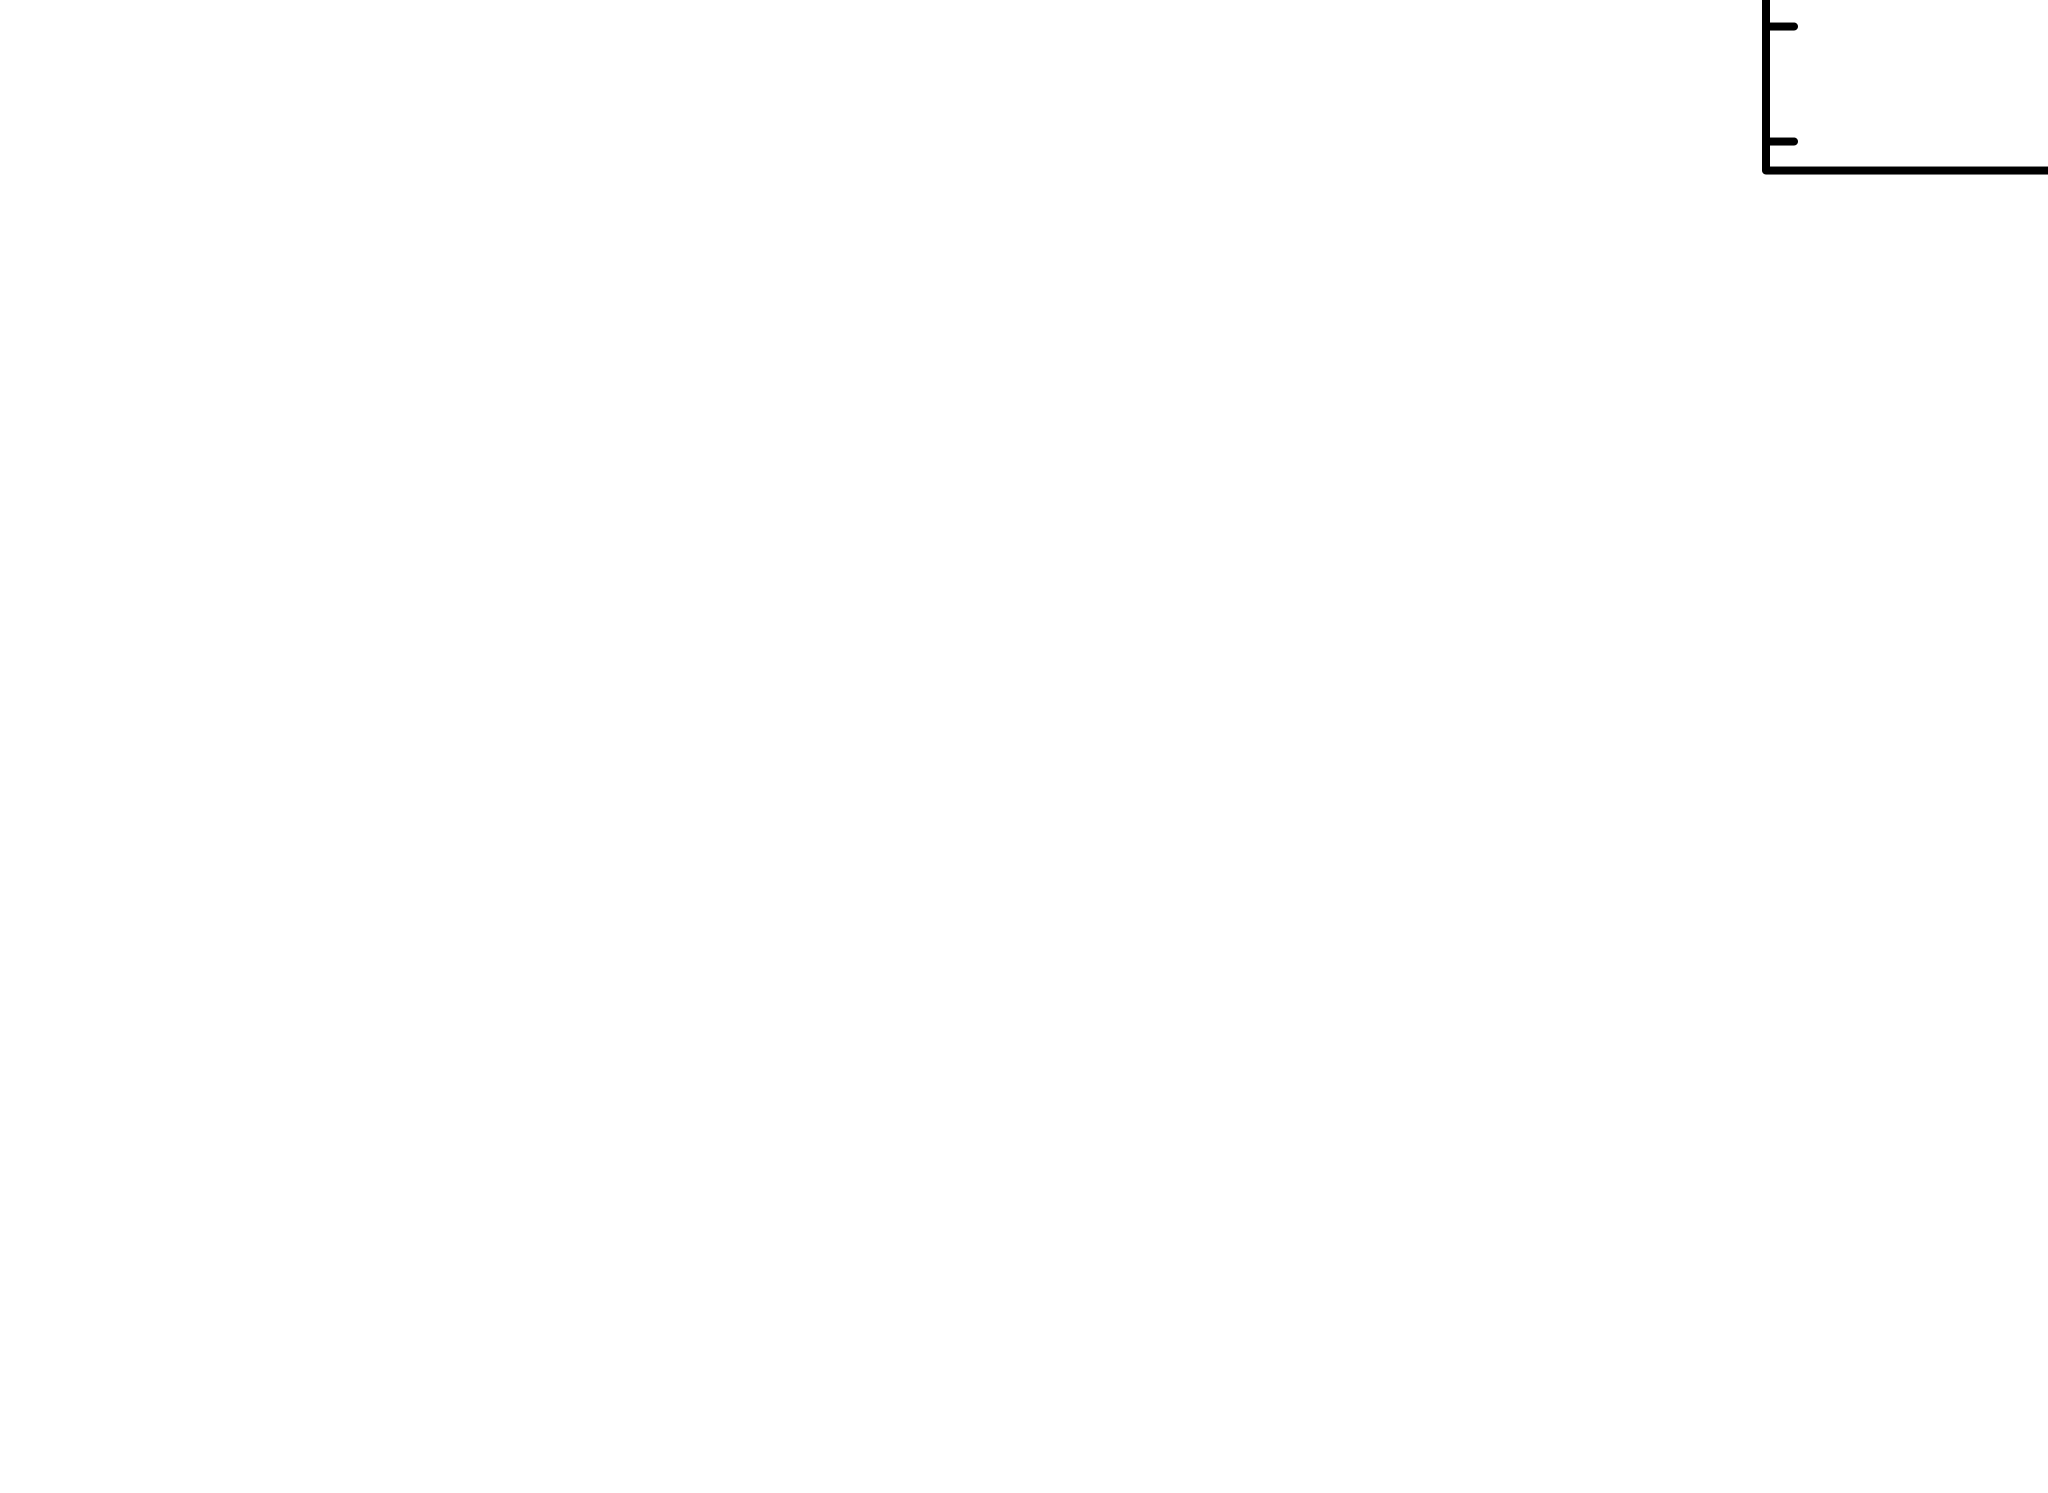

In [3]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              5.585924e+11     using 13 bins.

Test statistic : Chi-Squared              5.585924e+11     using 13 bins.
 Null hypothesis probability of 0.000000e+00 with 10 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
133.897      2.79346       0      0.225794       1.20736   4.19988e-06
109.514      909646       -1    0.00559230       1.64721   3.92890e-06
90.3329      2.04688e+06  -2      0.490441       5.52440   2.50347e-0

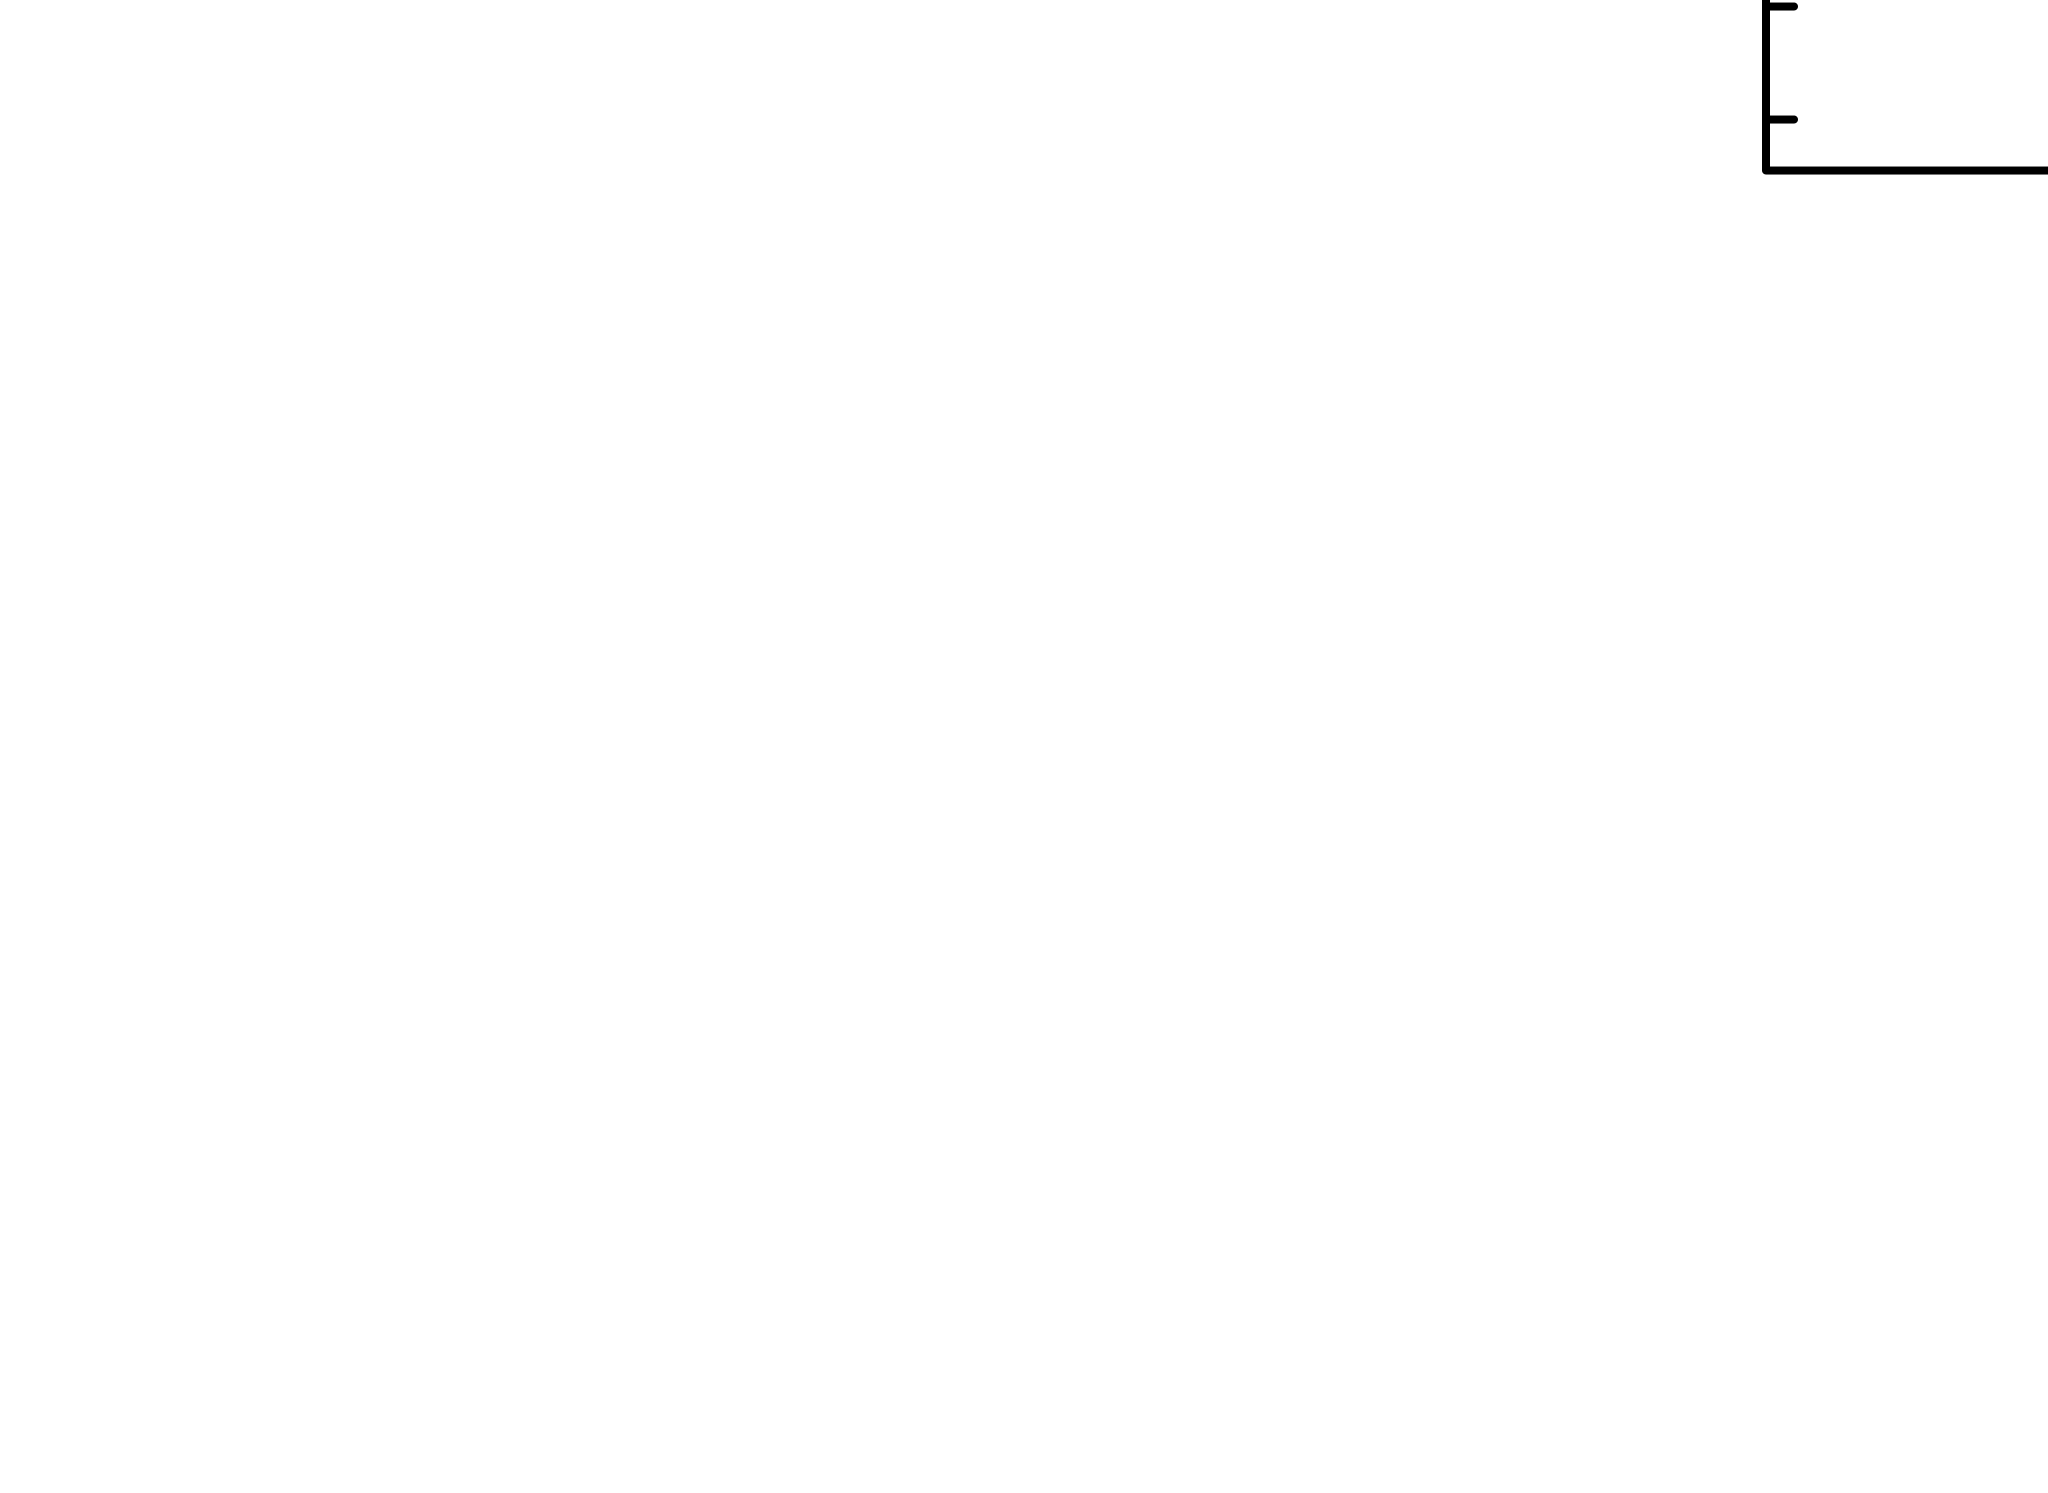

In [4]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

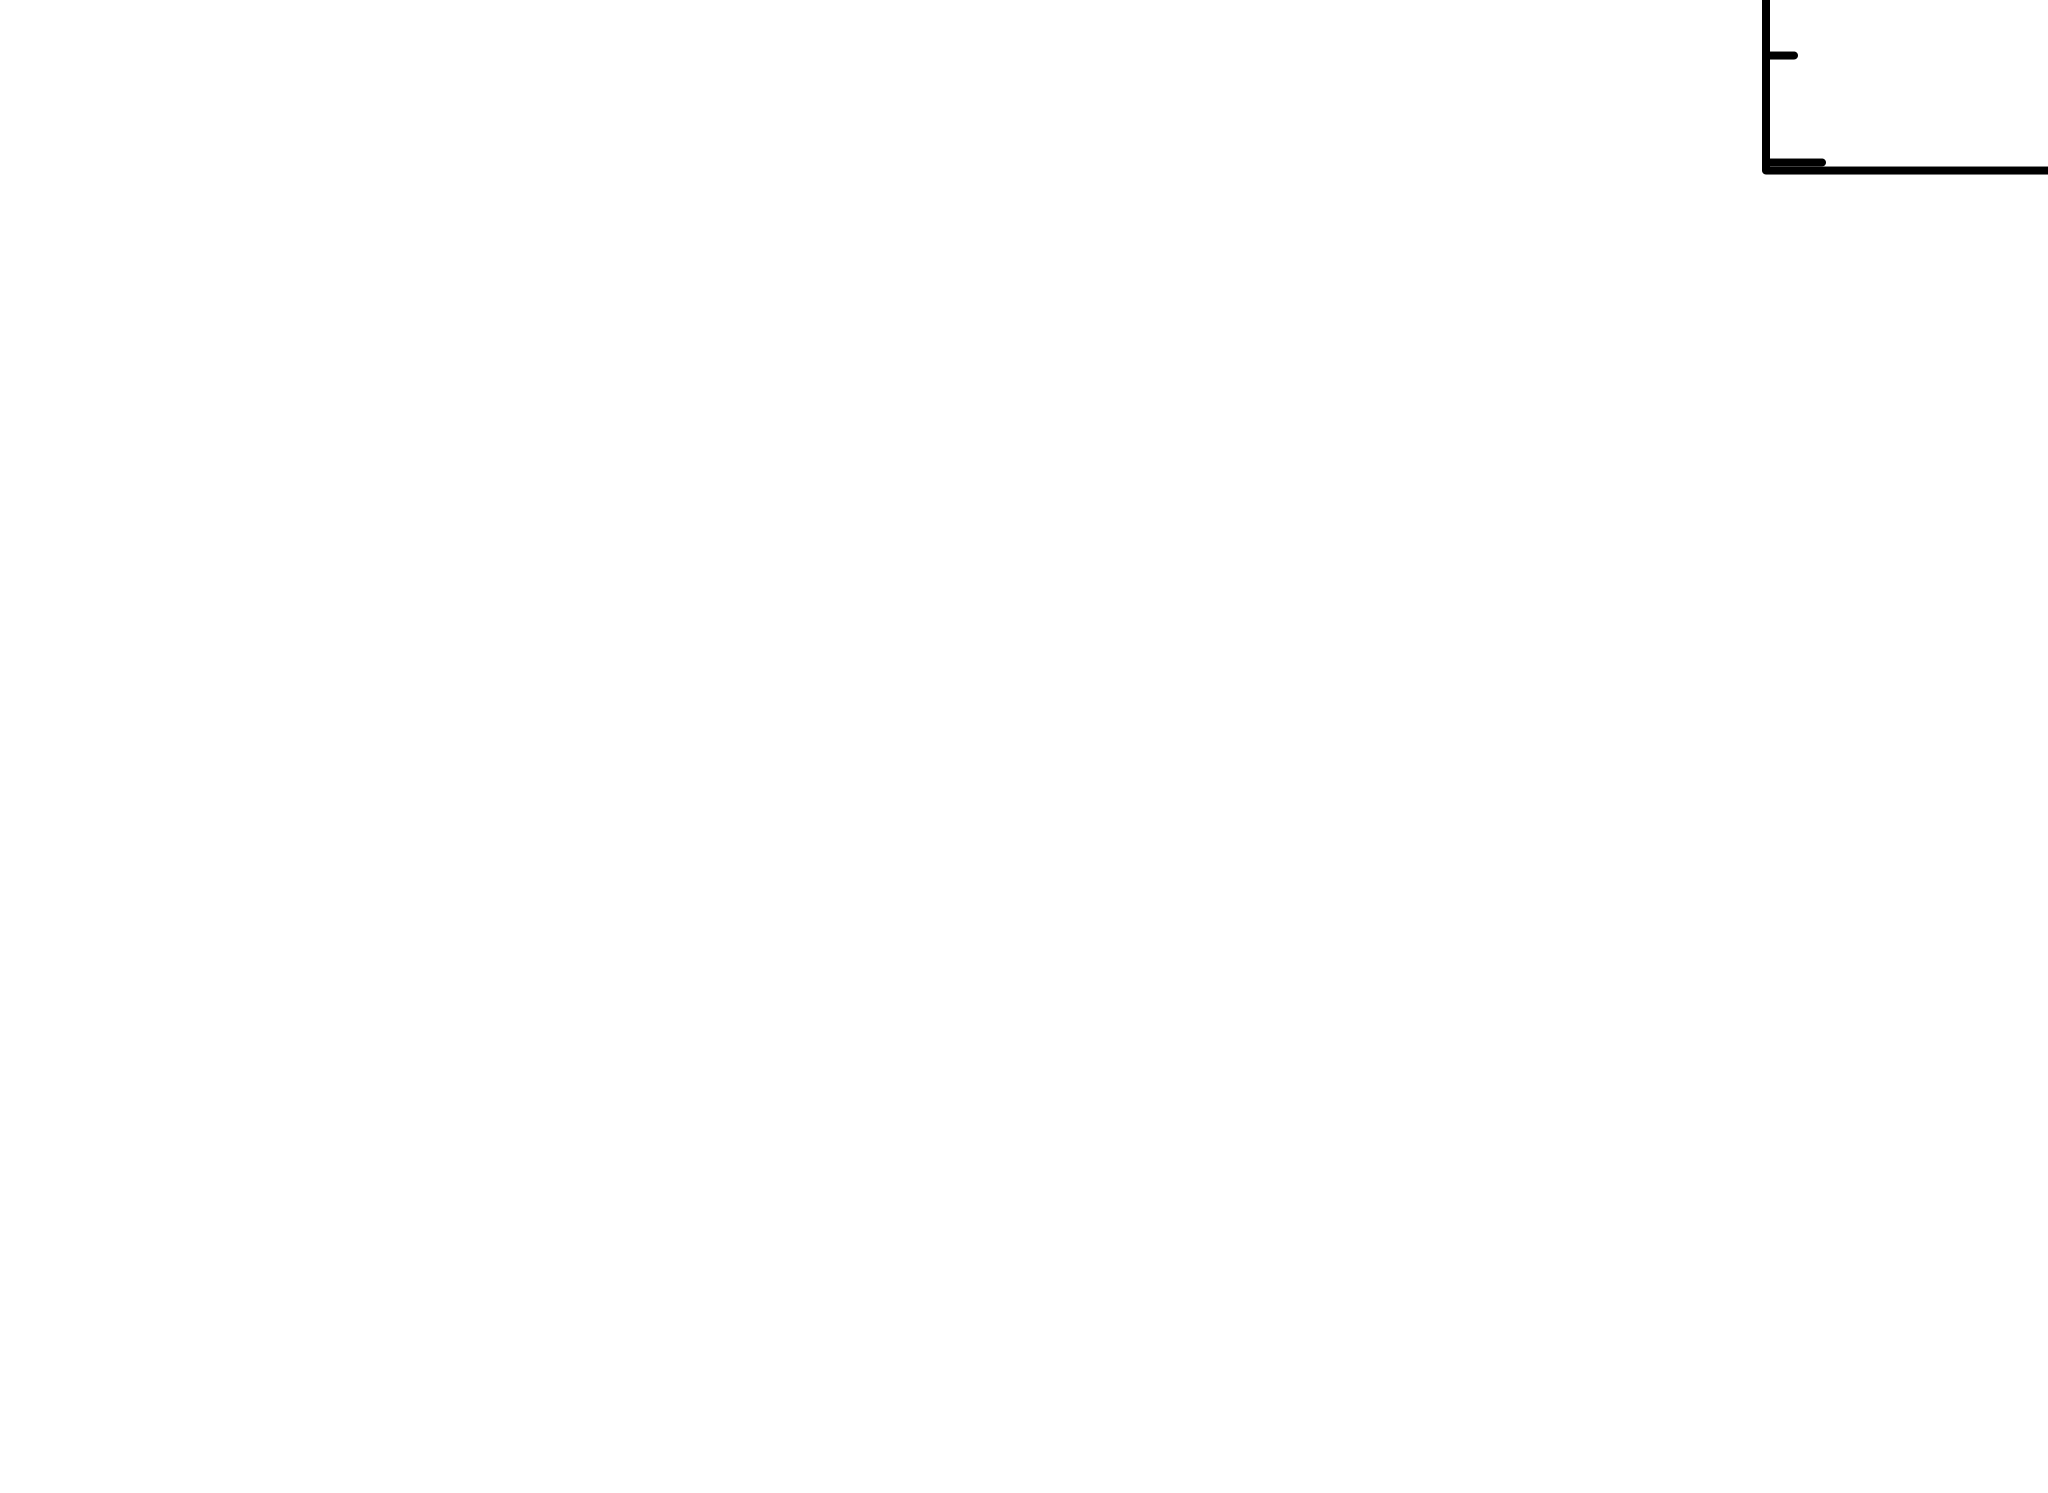


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              7.671661e+09     using 13 bins.

Test statistic : Chi-Squared              7.671661e+09     using 13 bins.
 Null hypothesis probability of 0.000000e+00 with 10 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
52.8402      14.0051      -3      0.628032      0.733313   

In [5]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")